In [1]:
import numpy as np
import scipy.interpolate as interp
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

# Adjust matplotlib settings
plt.rc('figure', titlesize=32)  # fontsize of the figure title
plt.rc('axes', labelsize=28, titlesize=28)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=23)    # fontsize of the tick labels
plt.rc('ytick', labelsize=23)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

def iso226(phons, freqs=None):
    """
    Returns equal loudness contour at the specified level of phons.
    """

    # Frequencies in equal-loudness contour
    f = np.array([
        20, 25, 31.5, 40, 50, 63, 80, 100, 125, 160, 
        200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 
        2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000, 12500
    ])

    # Threshold of hearing at each frequency
    af = np.array([
        .532, .506, .480, .455, .432, .409, .387, .367, .349, .330,
        .315, .301, .288, .276, .267, .259, .253, .250, .246, .244,
        .243, .243, .243, .242, .242, .245, .254, .271, .301
    ])

    # Magnitude of linear transfer function at each frequency
    LU = np.array([
        -31.6, -27.2, -23.0, -19.1, -15.9, -13.0, -10.3, -8.1, -6.2, -4.5, 
        -3.1, -2.0, -1.1, -0.4, 0.0, 0.3, 0.5, 0.0, -2.7, -4.1, 
        -1.0, 1.7, 2.5, 1.2, -2.1, -7.1, -11.2, -10.7, -3.1
    ])

    # Exponent for loudness perception at each frequency
    Tf = np.array([
        78.5, 68.7, 59.5, 51.1, 44.0, 37.5, 31.5, 26.5, 22.1, 17.9,
        14.4, 11.4, 8.6, 6.2, 4.4, 3.0, 2.2, 2.4, 3.5, 1.7,
        -1.3, -4.2, -6.0, -5.4, -1.5, 6.0, 12.6, 13.9, 12.3
    ])

    # Set phons to get values for
    Ln = phons

    Af = .00447 * (10 ** (.025 * Ln) - 1.15) + (.4 * 10 ** ((Tf + LU) / 10 - 9)) ** af
    Lp = 10 / af * np.log10(Af) - LU + 94
    
    if freqs is not None:
        spline = interp.splrep(f, Lp)
        elc = interp.splev(freqs, spline)
    else:
        elc = Lp
        
    return elc

def salience(f, LX=25):
    """
    Calculates salience for the specified frequencies based on Equation 12 of Terhardt et al., 1982.
    """
    
    WS = (1 - np.exp(-LX / 15)) * (1 + .07 * (f / 700 - 700 / f) ** 2) ** -.5 if LX >= 0 else 0
    
    return WS

In [2]:
# Define frequencies (in Hz) to calculate scores for
f = np.arange(20, 10001, 1)

# Define pitch height as log-linearly related to frequency
height = np.log10(f)
# Calculate equal loudness contour and then invert it
sens = iso226(40, f) * -1
# Calculate pitch salience at each frequency
sal = salience(f)

# Normalize all scores to the range [0, 1] for plotting
norm_height = (height - height.min()) / (height.max() - height.min())
norm_sens = (sens - sens.min()) / (sens.max() - sens.min())
norm_sal = (sal - sal.min()) / (sal.max() - sal.min())

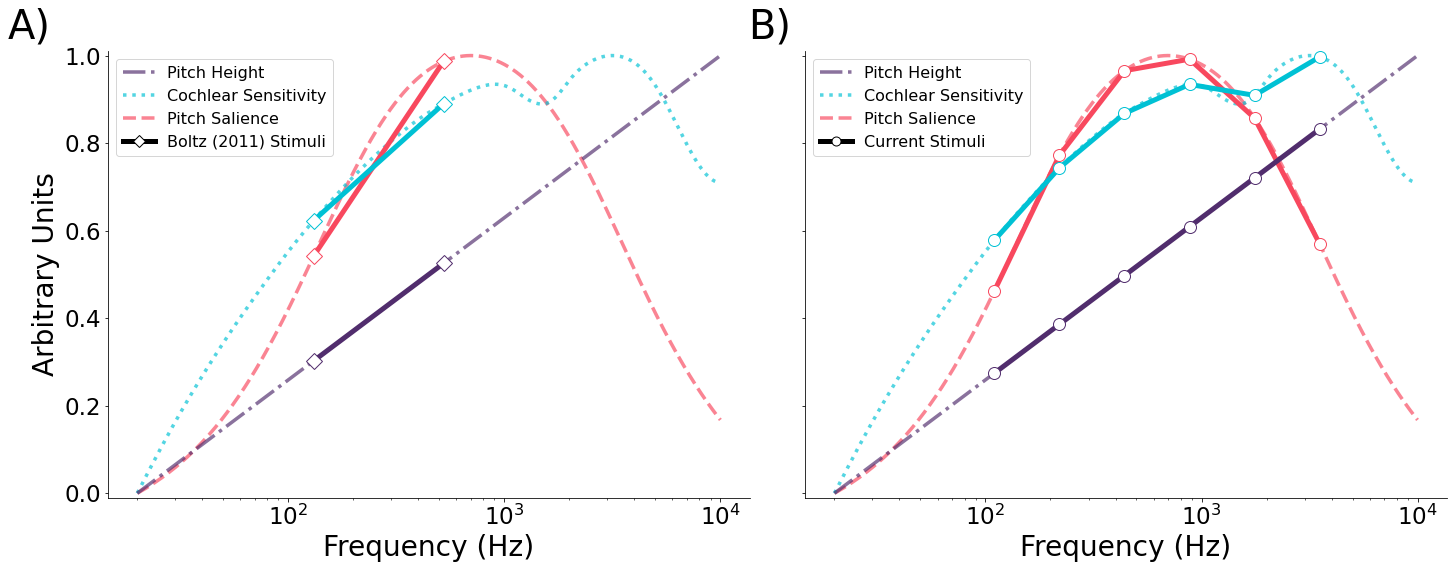

In [3]:
pal = sns.color_palette('cubehelix', 10)

factor_lw = 3.5
data_lw = 5
ph_color = '#512D6D'
cs_color = '#00C1D4'
ps_color = '#F8485E'
ph_ls = '-.'
cs_ls = ':'
ps_ls = '--'

plt.subplot(121)

# Plot curves
plt.plot(f, norm_height, c=ph_color, label='Pitch Height', ls=ph_ls, lw=factor_lw, zorder=4, alpha=.67)
plt.plot(f, norm_sens, c=cs_color, label='Cochlear Sensitivity', ls=cs_ls, lw=factor_lw, zorder=3, alpha=.67)
plt.plot(f, norm_sal, c=ps_color, label='Pitch Salience', ls=ps_ls, lw=factor_lw, zorder=2, alpha=.67)

# Plot values of starting tones from Boltz (2011)
boltz_idx = np.where(np.isin(f, (131, 523)))
plt.plot([], [], c='k', lw=data_lw, ls='-', marker='D', mfc='w', ms=9, label='Boltz (2011) Stimuli')
plt.plot(f[boltz_idx], norm_height[boltz_idx], c=ph_color, lw=data_lw, ls='-', marker='D', ms=12, mfc='w', zorder=7)
plt.plot(f[boltz_idx], norm_sens[boltz_idx], c=cs_color, lw=data_lw, ls='-', marker='D', ms=12, mfc='w', zorder=6)
plt.plot(f[boltz_idx], norm_sal[boltz_idx], c=ps_color, lw=data_lw, ls='-', marker='D', ms=12, mfc='w', zorder=5)

# Formatting
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Arbitrary Units')
plt.ylim(-.01, 1.01)
plt.legend()
plt.text(5, 1.04, 'A)', fontsize=40)

plt.subplot(122)

# Plot curves
plt.plot(f, norm_height, c=ph_color, label='Pitch Height', ls=ph_ls, lw=factor_lw, zorder=4, alpha=.67)
plt.plot(f, norm_sens, c=cs_color, label='Cochlear Sensitivity', ls=cs_ls, lw=factor_lw, zorder=3, alpha=.67)
plt.plot(f, norm_sal, c=ps_color, label='Pitch Salience', ls=ps_ls, lw=factor_lw, zorder=2, alpha=.67)

# Plot values of stimuli from the present study
stim_idx = np.where(np.isin(f, (110, 220, 440, 880, 1760, 3520)))
plt.plot([], [], c='k', lw=data_lw, ls='-', marker='o', mfc='w', ms=9, label='Current Stimuli')
plt.plot(f[stim_idx], norm_height[stim_idx], c=ph_color, lw=data_lw, ls='-', marker='o', mfc='w', ms=12, zorder=7)
plt.plot(f[stim_idx], norm_sens[stim_idx], c=cs_color, lw=data_lw, ls='-', marker='o', mfc='w', ms=12, zorder=6)
plt.plot(f[stim_idx], norm_sal[stim_idx], c=ps_color, lw=data_lw, ls='-', marker='o', mfc='w', ms=12, zorder=5)

# Formatting
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylim(-.01, 1.01)
plt.yticks([0, .2, .4, .6, .8, 1], ['', '', '', '', '', ''])
plt.legend()
plt.text(8, 1.04, 'B)', fontsize=40)

plt.gcf().set_size_inches(20, 8)
plt.tight_layout()


plt.gcf().savefig('figures/stimulus_plot.svg')